<a href="https://colab.research.google.com/github/jiya-0905/ml-lab-eval/blob/main/mlaval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret &> /dev/null

In [2]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
df = pd.read_csv('/content/Fuel_cell_performance_data-Full.csv')

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


In [5]:
columns_to_drop = ['Target1', 'Target3', 'Target4', 'Target5']
df = df.drop(columns=columns_to_drop)

In [6]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target2
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,1.531
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,1.690
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,1.865
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,1.920
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,1.711


In [7]:
setup(data = df, target = 'Target2',
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',train_size = 0.7,
      data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2673,0.1043,0.3222,0.6399,0.1440,0.2604,0.2320
lr,Linear Regression,0.2671,0.1043,0.3222,0.6398,0.1439,0.2593,0.8100
ridge,Ridge Regression,0.2671,0.1043,0.3222,0.6398,0.1439,0.2594,0.3300
lar,Least Angle Regression,0.2671,0.1043,0.3222,0.6398,0.1439,0.2593,0.2630
huber,Huber Regressor,0.2676,0.1051,0.3234,0.6371,0.1443,0.2595,0.2360
et,Extra Trees Regressor,0.2704,0.1066,0.3256,0.6323,0.1459,0.2654,0.5860
rf,Random Forest Regressor,0.2765,0.1144,0.3372,0.6050,0.1508,0.2713,1.2430
gbr,Gradient Boosting Regressor,0.2762,0.1146,0.3377,0.6039,0.1517,0.2704,0.6010
ada,AdaBoost Regressor,0.2909,0.1153,0.3392,0.6024,0.1539,0.2985,0.6950
lightgbm,Light Gradient Boosting Machine,0.2859,0.1235,0.3503,0.5737,0.1567,0.2790,0.7760


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [8]:
models=['ridge','br','lr','et','gbr','rf','lar','ada','huber','lightbgm']

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2573,0.0980,0.3131,0.6548,0.1385,0.2423
1,0.2382,0.0818,0.2859,0.7010,0.1281,0.2302
2,0.2641,0.1139,0.3375,0.6333,0.1509,0.2606
3,0.2781,0.1069,0.3269,0.6223,0.1493,0.2997
4,0.2903,0.1162,0.3409,0.6009,0.1542,0.2834
5,0.2646,0.1011,0.3180,0.6738,0.1385,0.2390
6,0.3049,0.1234,0.3513,0.5382,0.1522,0.2656
7,0.2323,0.0788,0.2808,0.7420,0.1284,0.2399
8,0.2766,0.1143,0.3380,0.6145,0.1490,0.2591


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.2552,0.0957,0.3093,0.6749,0.1384,0.2488


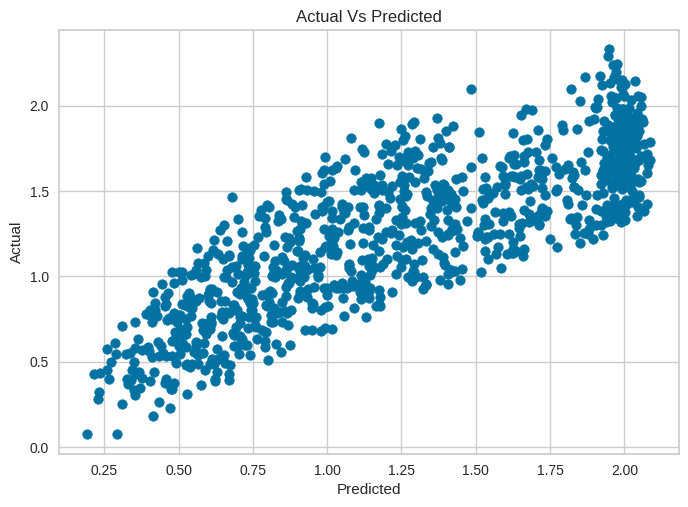

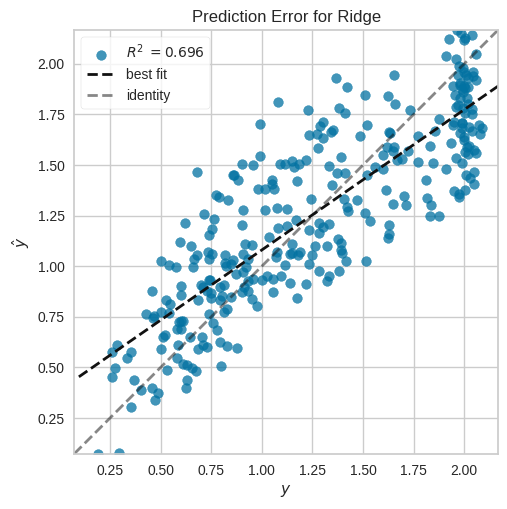

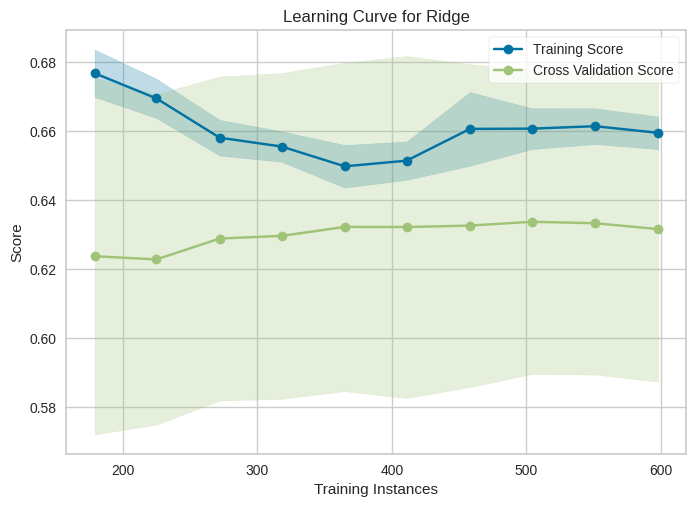

Skipping 'vc' plot for model 'ridge'. It might not be supported.


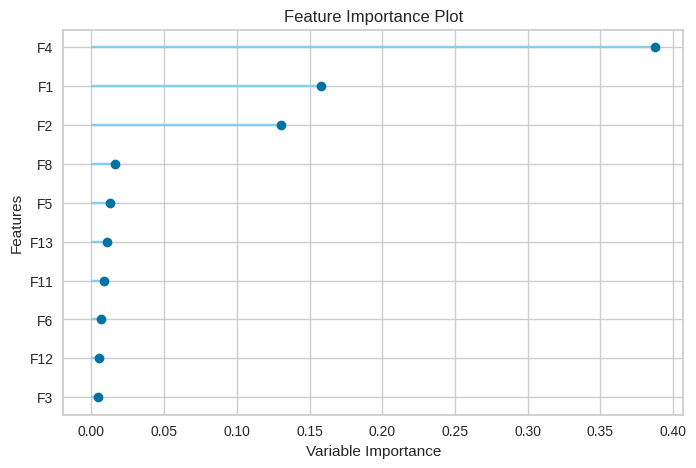

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2574,0.0980,0.3131,0.6548,0.1383,0.2427
1,0.2377,0.0815,0.2855,0.7019,0.1278,0.2293
2,0.2638,0.1137,0.3372,0.6339,0.1508,0.2610
3,0.2793,0.1071,0.3272,0.6216,0.1497,0.3025
4,0.2901,0.1161,0.3407,0.6015,0.1540,0.2839
5,0.2656,0.1014,0.3184,0.6729,0.1388,0.2405
6,0.3039,0.1229,0.3506,0.5400,0.1519,0.2651
7,0.2334,0.0795,0.2819,0.7399,0.1291,0.2420
8,0.2768,0.1142,0.3379,0.6148,0.1490,0.2603


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2554,0.0957,0.3094,0.6747,0.1384,0.2494


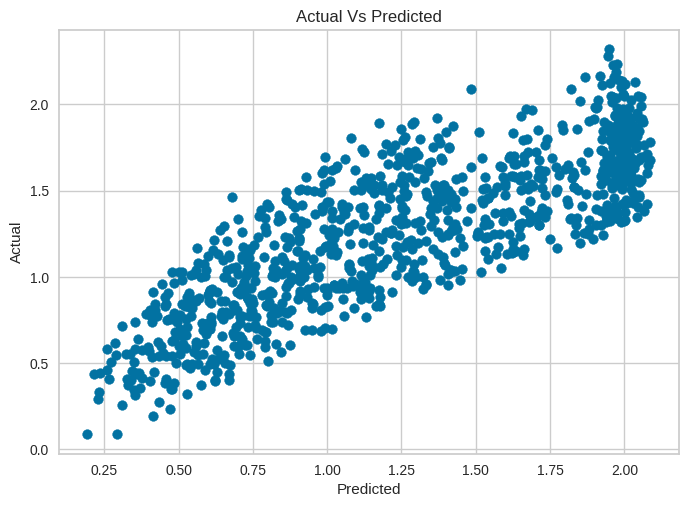

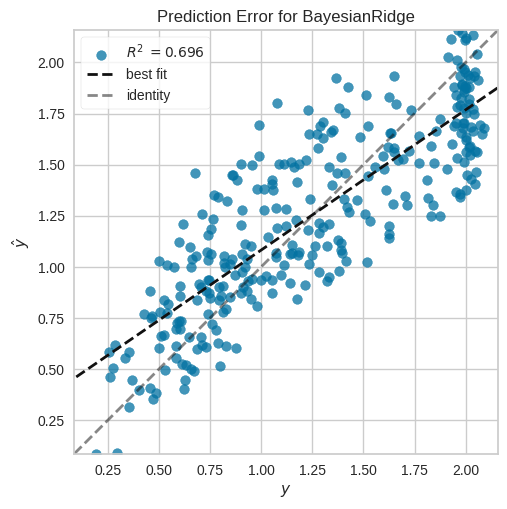

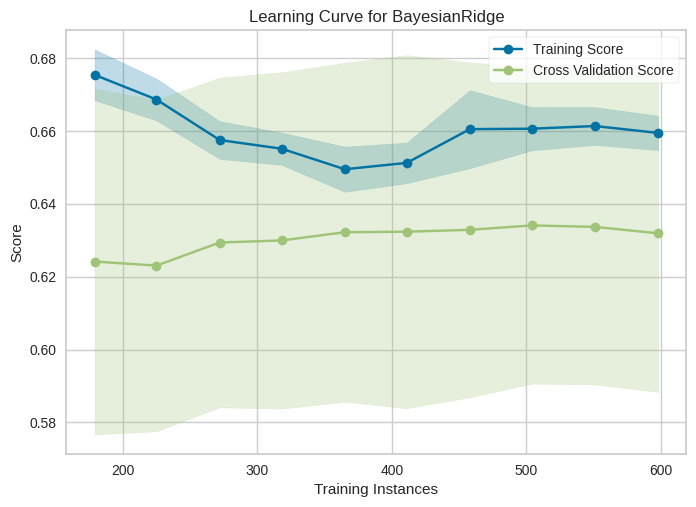

Skipping 'vc' plot for model 'br'. It might not be supported.


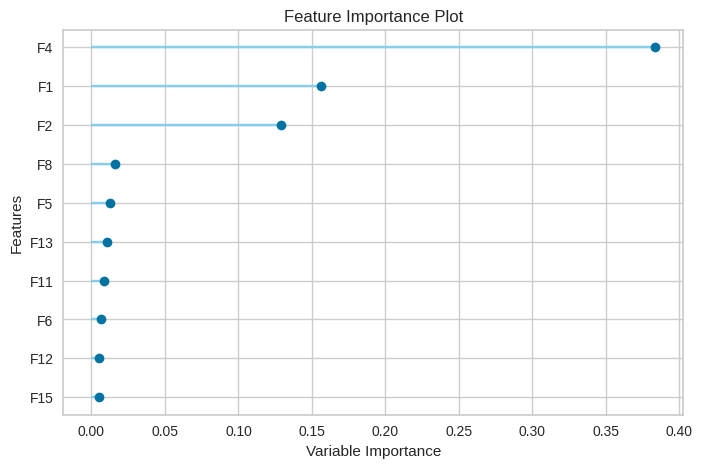

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2573,0.0980,0.3131,0.6548,0.1385,0.2423
1,0.2382,0.0818,0.2860,0.7008,0.1281,0.2303
2,0.2642,0.1139,0.3375,0.6333,0.1509,0.2605
3,0.2780,0.1069,0.3269,0.6223,0.1493,0.2993
4,0.2903,0.1163,0.3410,0.6008,0.1542,0.2833
5,0.2645,0.1011,0.3179,0.6739,0.1385,0.2387
6,0.3050,0.1235,0.3514,0.5379,0.1522,0.2656
7,0.2322,0.0787,0.2806,0.7423,0.1283,0.2396
8,0.2766,0.1143,0.3381,0.6144,0.1491,0.2589


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2551,0.0957,0.3093,0.6749,0.1384,0.2488


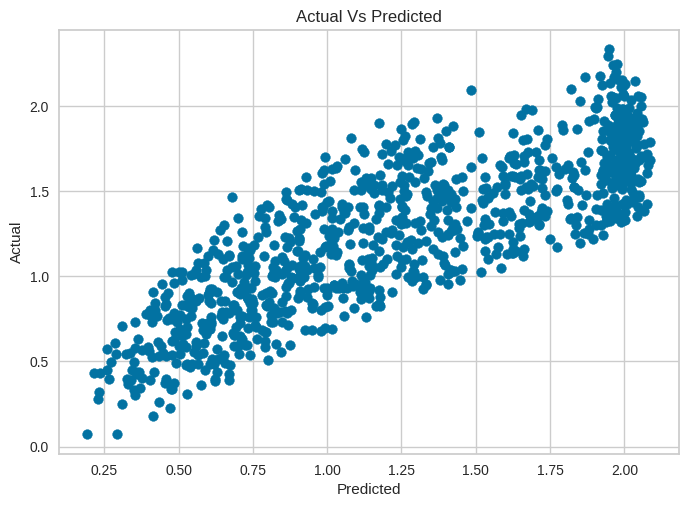

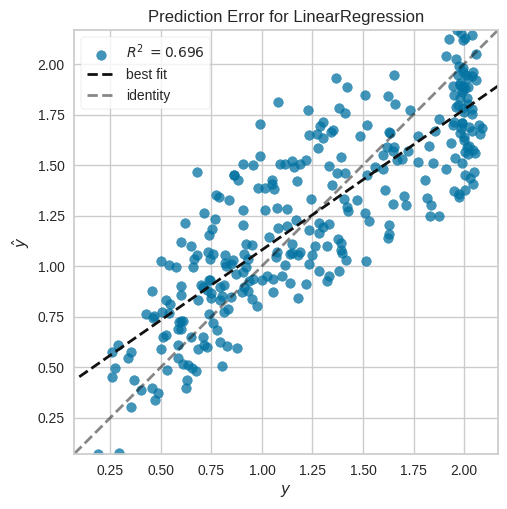

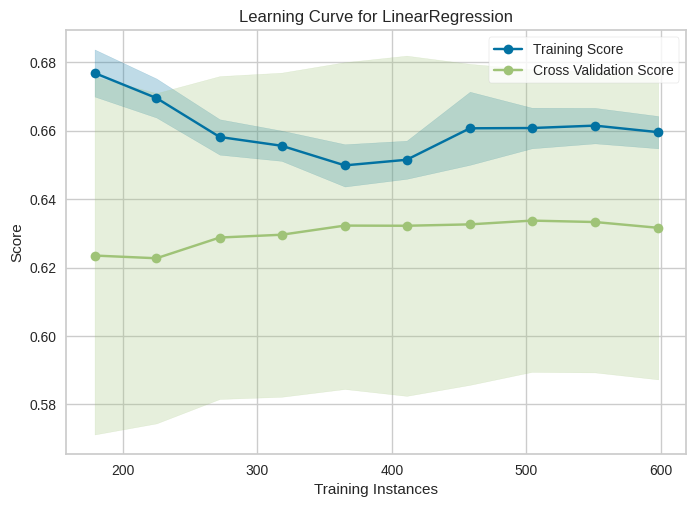

Skipping 'vc' plot for model 'lr'. It might not be supported.


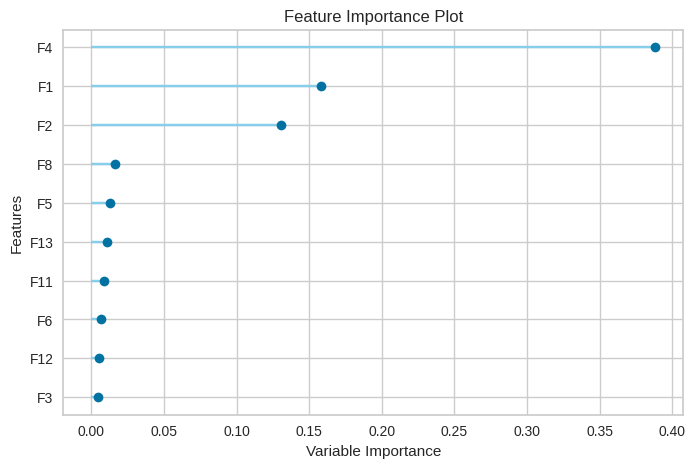

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2446,0.0872,0.2953,0.6930,0.1291,0.2230
1,0.2407,0.0846,0.2908,0.6906,0.1282,0.2263
2,0.2702,0.1186,0.3444,0.6182,0.1528,0.2660
3,0.2784,0.1058,0.3253,0.6260,0.1505,0.3072
4,0.2879,0.1158,0.3403,0.6025,0.1542,0.2904
5,0.2716,0.1042,0.3229,0.6637,0.1414,0.2466
6,0.3030,0.1258,0.3546,0.5293,0.1538,0.2690
7,0.2458,0.0872,0.2953,0.7146,0.1358,0.2457
8,0.2716,0.1103,0.3321,0.6280,0.1518,0.2729


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0884,0.0345,0.1857,0.8829,0.0826,0.0855


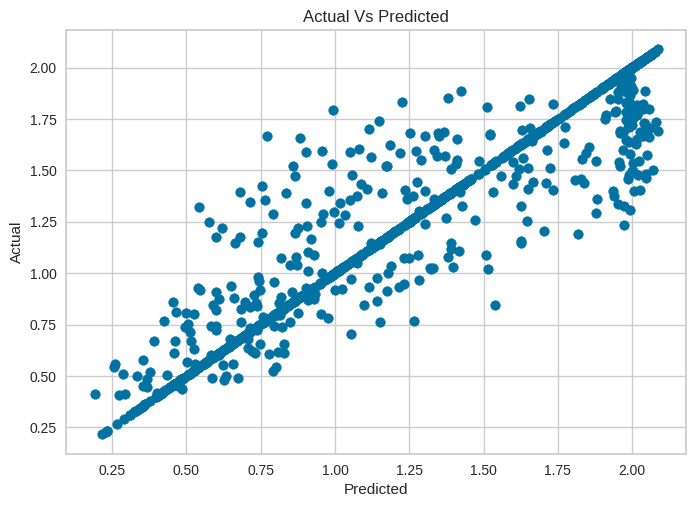

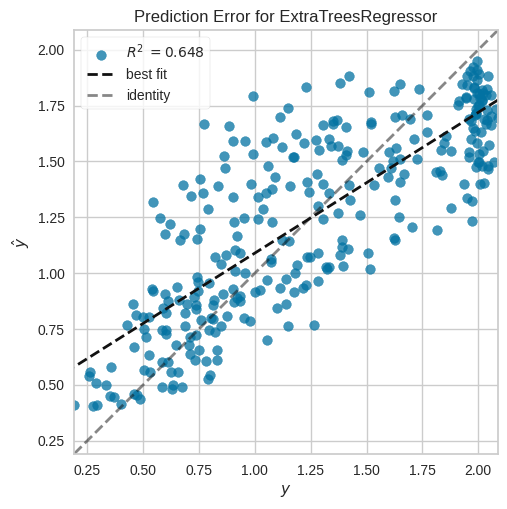

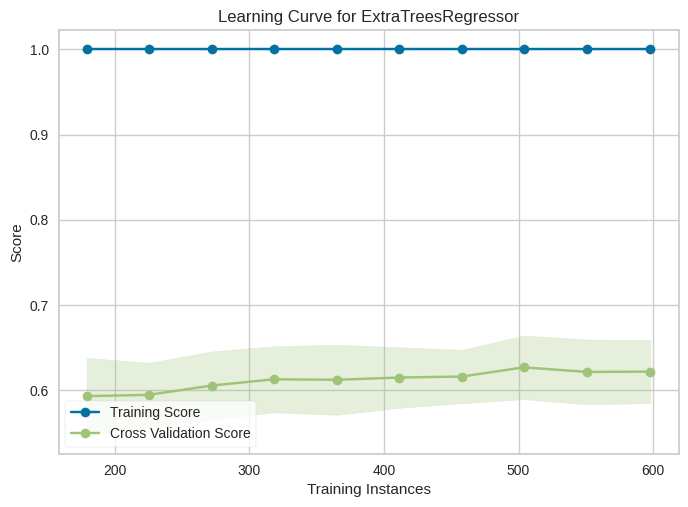

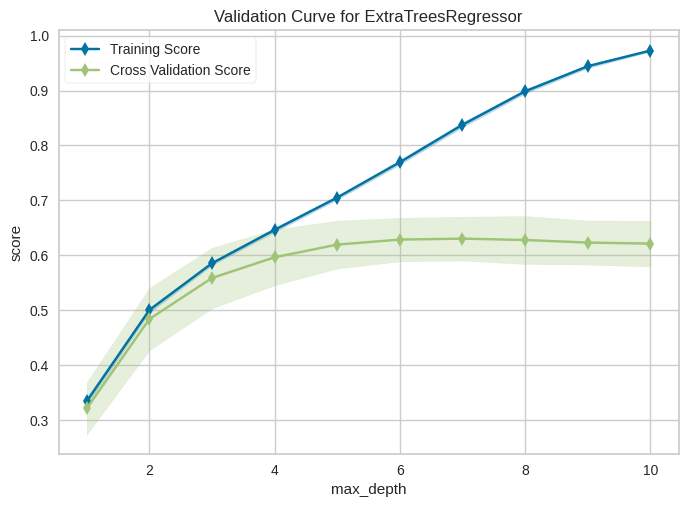

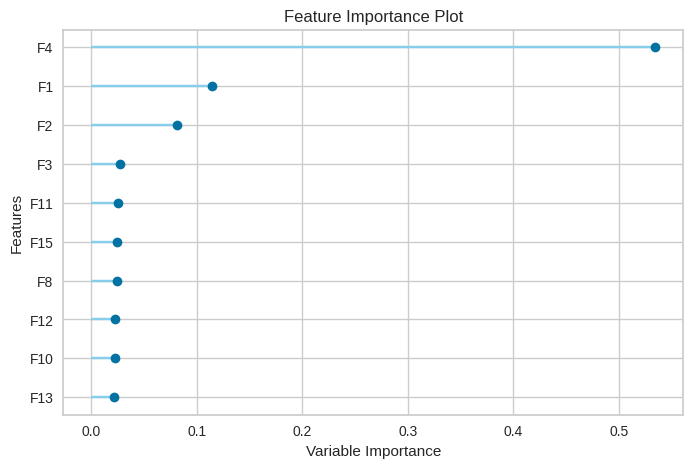

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2687,0.1068,0.3268,0.6240,0.1447,0.2466
1,0.2556,0.1001,0.3165,0.6338,0.1377,0.2295
2,0.2672,0.1144,0.3382,0.6318,0.1517,0.2700
3,0.2792,0.1098,0.3313,0.6120,0.1544,0.3059
4,0.3058,0.1294,0.3598,0.5556,0.1626,0.2963
5,0.2582,0.1046,0.3234,0.6626,0.1422,0.2363
6,0.3128,0.1329,0.3646,0.5025,0.1623,0.2969
7,0.2390,0.0862,0.2936,0.7179,0.1372,0.2486
8,0.2831,0.1223,0.3497,0.5875,0.1567,0.2726


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2008,0.0637,0.2524,0.7835,0.1132,0.1937


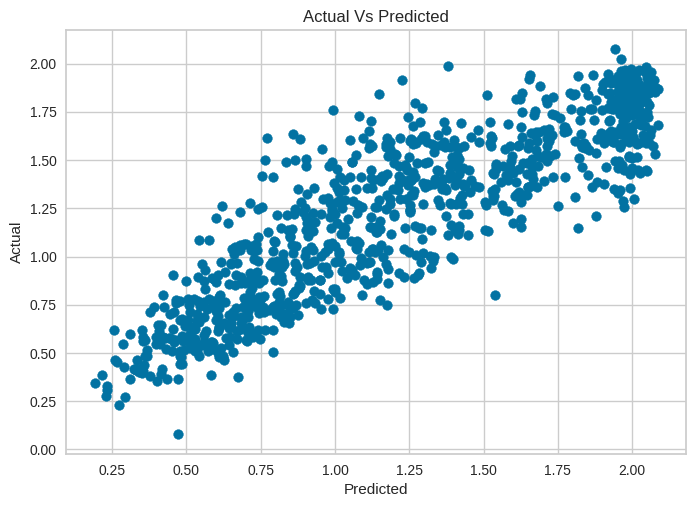

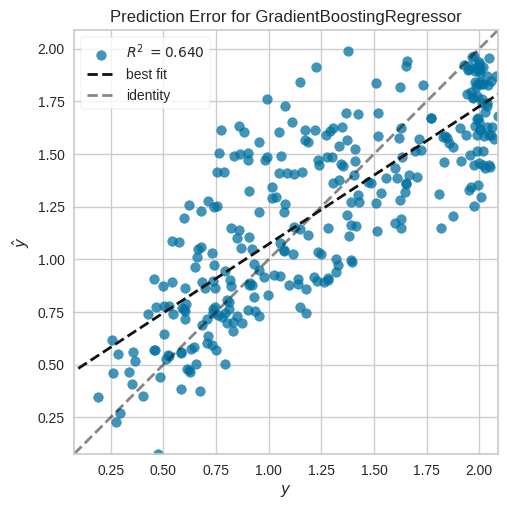

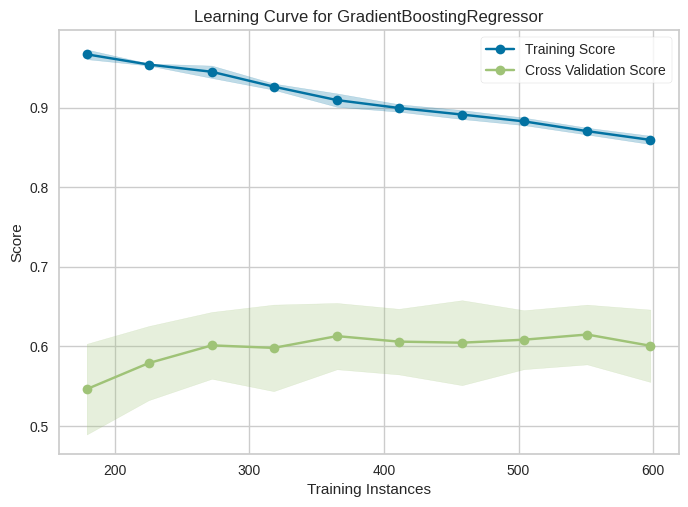

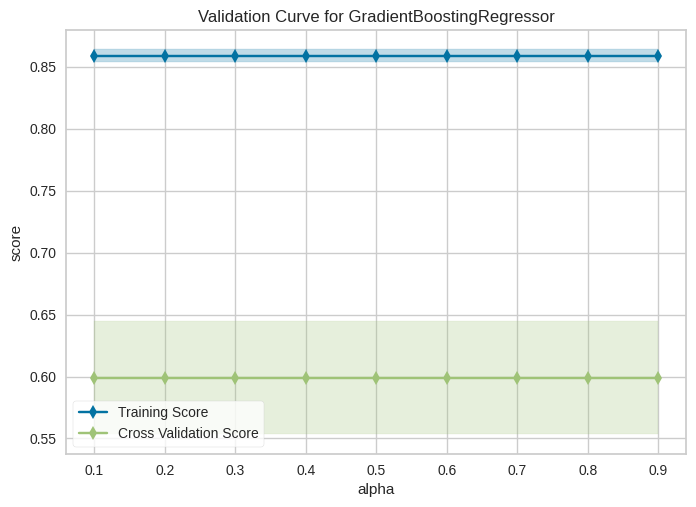

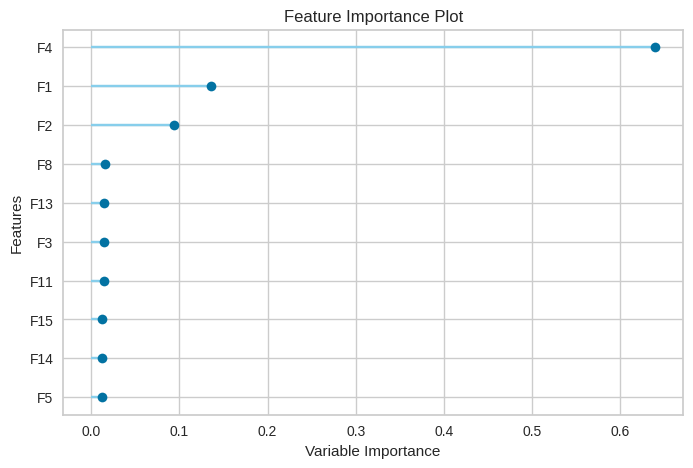

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2654,0.1042,0.3227,0.6332,0.1402,0.2410
1,0.2487,0.0933,0.3055,0.6588,0.1345,0.2346
2,0.2887,0.1307,0.3616,0.5791,0.1606,0.2845
3,0.2756,0.1084,0.3293,0.6168,0.1515,0.3017
4,0.2902,0.1182,0.3438,0.5943,0.1556,0.2912
5,0.2719,0.1122,0.3350,0.6380,0.1459,0.2451
6,0.3202,0.1426,0.3776,0.4665,0.1644,0.2906
7,0.2379,0.0829,0.2879,0.7287,0.1330,0.2379
8,0.2810,0.1215,0.3486,0.5901,0.1589,0.2806


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1539,0.0447,0.2114,0.8482,0.0951,0.1514


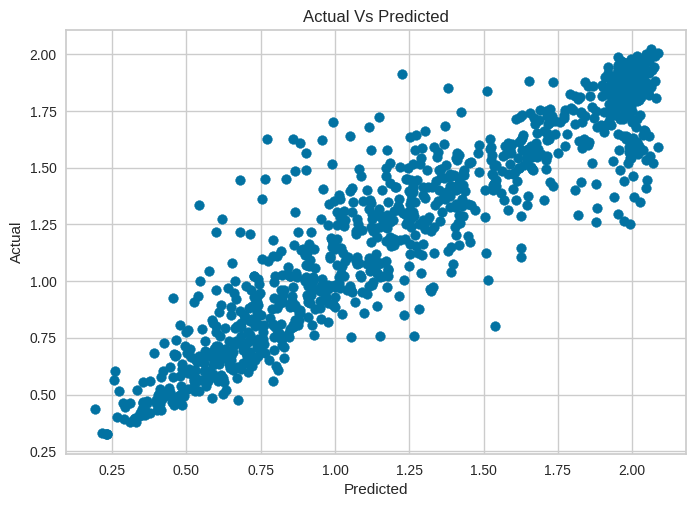

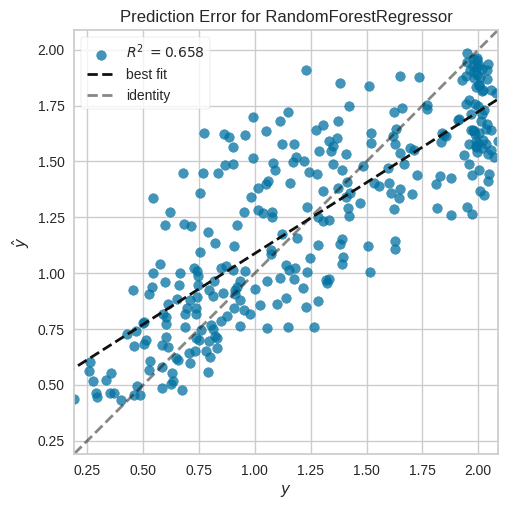

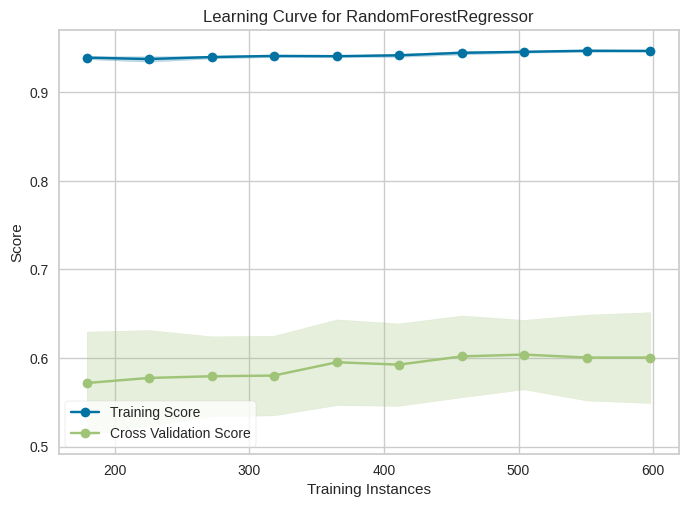

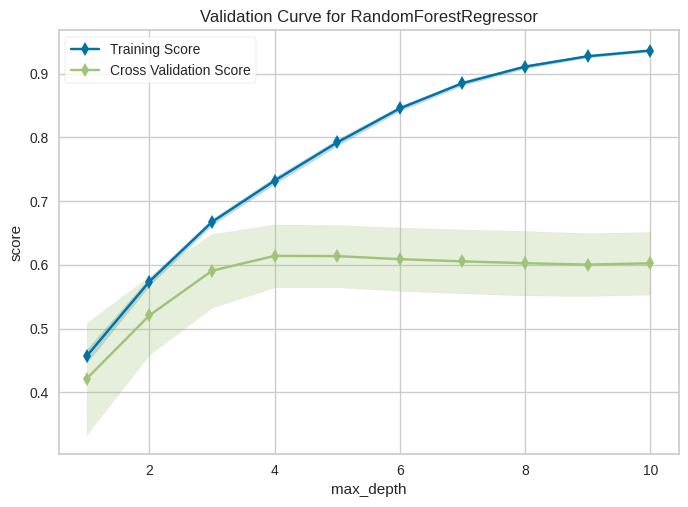

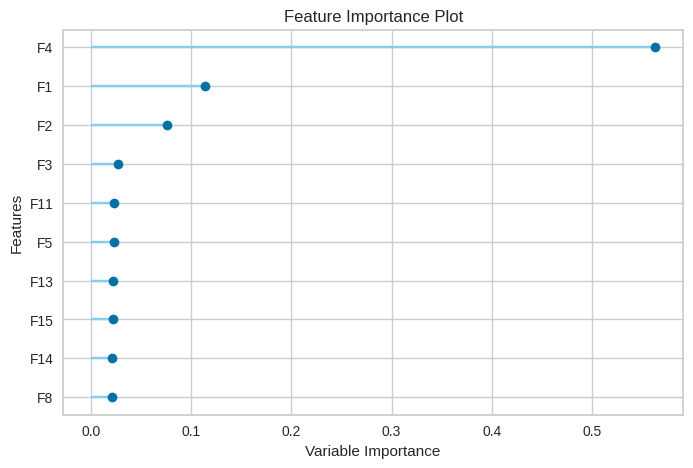

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2573,0.0980,0.3131,0.6548,0.1385,0.2423
1,0.2382,0.0818,0.2860,0.7008,0.1281,0.2303
2,0.2642,0.1139,0.3375,0.6333,0.1509,0.2605
3,0.2780,0.1069,0.3269,0.6223,0.1493,0.2993
4,0.2903,0.1163,0.3410,0.6008,0.1542,0.2833
5,0.2645,0.1011,0.3179,0.6739,0.1385,0.2387
6,0.3050,0.1235,0.3514,0.5379,0.1522,0.2656
7,0.2322,0.0787,0.2806,0.7423,0.1283,0.2396
8,0.2766,0.1143,0.3381,0.6144,0.1491,0.2589


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,0.2551,0.0957,0.3093,0.6749,0.1384,0.2488


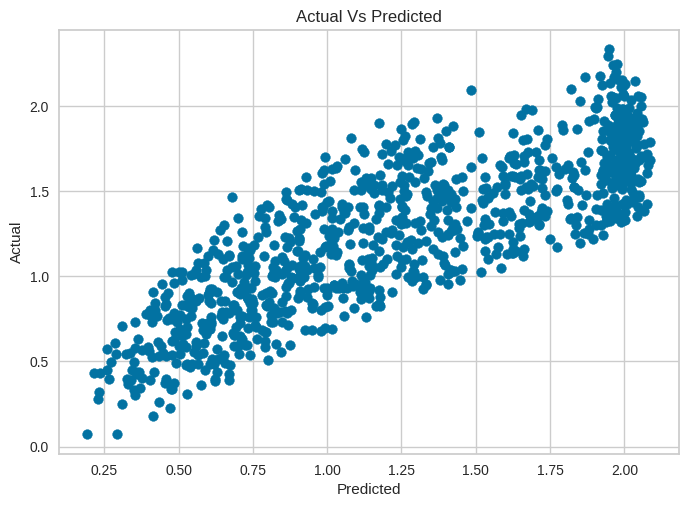

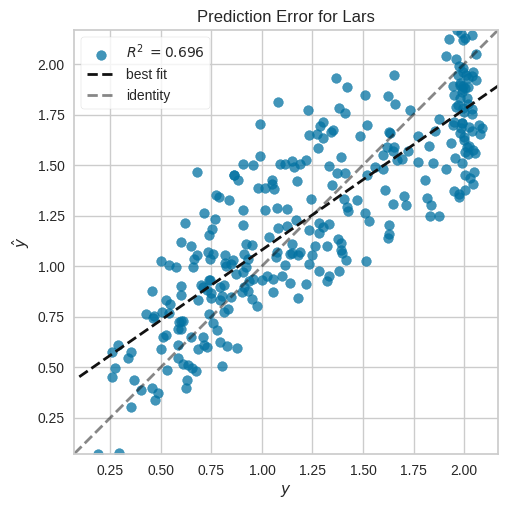

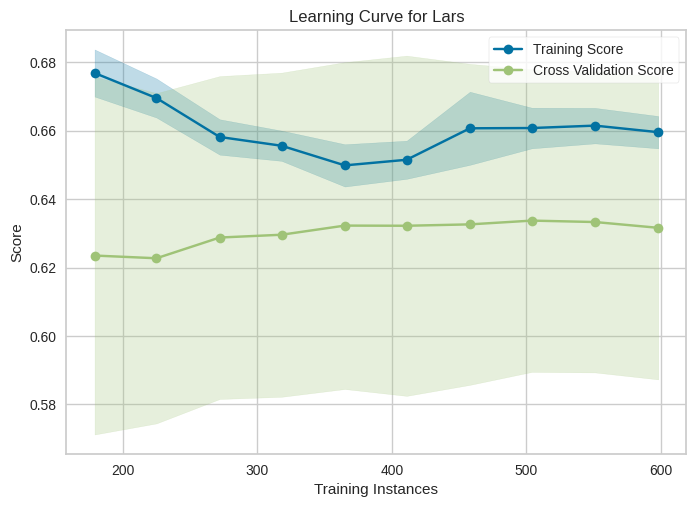

Skipping 'vc' plot for model 'lar'. It might not be supported.


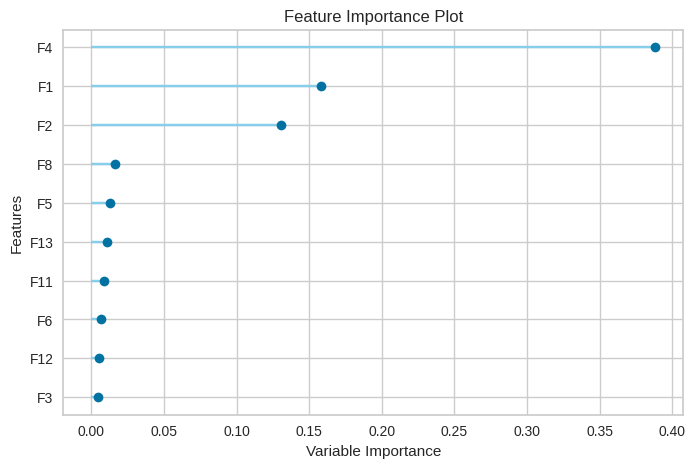

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2687,0.1097,0.3312,0.6138,0.1475,0.2639
1,0.2763,0.1025,0.3202,0.6251,0.1434,0.2697
2,0.3003,0.1262,0.3553,0.5937,0.1611,0.3064
3,0.2862,0.1101,0.3318,0.6108,0.1585,0.3410
4,0.3190,0.1297,0.3601,0.5548,0.1667,0.3443
5,0.2808,0.1068,0.3268,0.6554,0.1425,0.2577
6,0.3127,0.1232,0.3510,0.5390,0.1545,0.2902
7,0.2780,0.1021,0.3195,0.6659,0.1466,0.2890
8,0.2906,0.1203,0.3468,0.5942,0.1558,0.2874


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.2769,0.1022,0.3196,0.6529,0.1452,0.2850


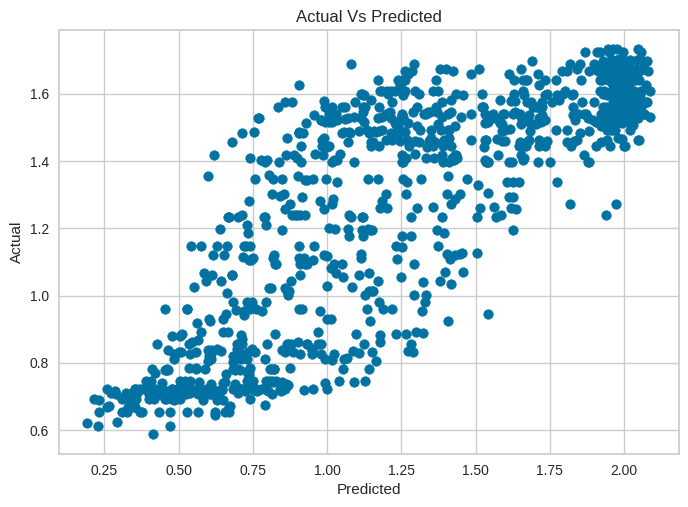

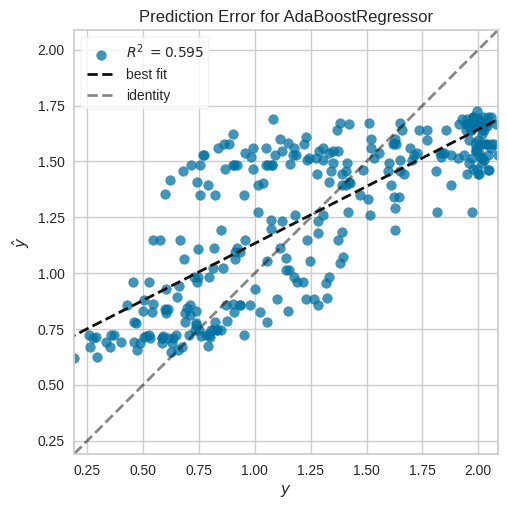

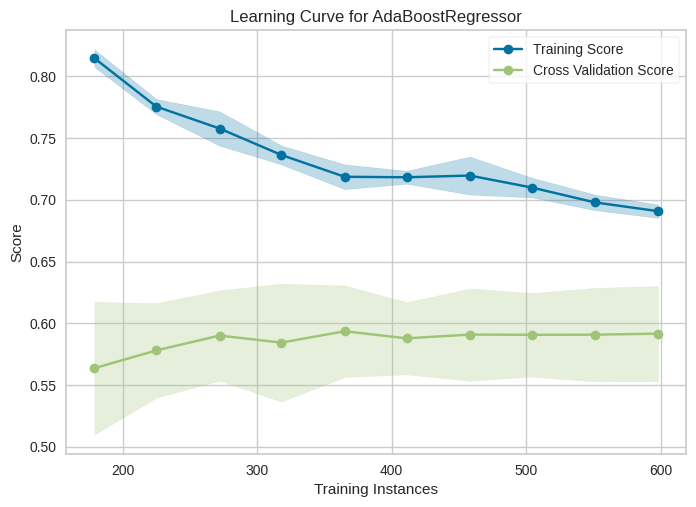

In [ ]:
for model in models:
  new_model = create_model(model)
  predictions = predict_model(new_model, data=df)
  predicted = predictions.iloc[:,-1]     # Last column
  actual = predictions.iloc[:,-2]        # 2nd last column
  plt.scatter(actual, predicted)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Actual Vs Predicted')
  plt.show()
  plot_model(new_model, plot='error')
  plot_model(new_model, plot='learning')
  # Check if the model supports 'vc' plot before attempting to plot it
  if model in ['rf', 'et', 'lightgbm', 'gbr', 'ada']:  # Models that generally support 'vc'
    try:
      plot_model(new_model, plot='vc')
    except TypeError:
      print(f"Model '{model}' does not support 'vc' plot.")
  else:
    print(f"Skipping 'vc' plot for model '{model}'. It might not be supported.")
  plot_model(new_model, plot='feature')